In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import ipdb

In [2]:
dir_ = os.listdir('./res/')

In [4]:
res_set = []

for i in dir_:
    if i.split('.')[-1] != 'csv':
        continue
    res_term = i.split('_')[1]
    res_ind = int(res_term[res_term.find('s')+1:])
    if not (res_ind in res_set):
        res_set.append(res_ind)

In [5]:
rel_table = pd.DataFrame([], columns=['resolution', 'num_class', 'NSk_mean', 'NSk_min', 'NSk_max', 'NSk_std'])

In [6]:
for i in range(len(dir_)):
    try:
        index_ind = dir_[i].split('_')[2]
    except:
        continue
        
    if index_ind == 'index.csv':
        res_term = dir_[i].split('_')[1]
        res_ind = int(res_term[res_term.find('s')+1:])
        
        data = pd.read_csv('./res/'+dir_[i])
        rel_table.loc[i, 'resolution'] = res_ind
        rel_table.loc[i, ['NSk_mean', 'NSk_min', 'NSk_max', 'NSk_std']] = data.loc[0, ['NSk_mean', 'NSk_min', 'NSk_max', 'NSk_std']]
        
        data2 = pd.read_csv('./res/'+dir_[i+1])
        rel_table.loc[i, 'num_class'] = data2.iloc[:, 0].drop_duplicates().shape[0]
        

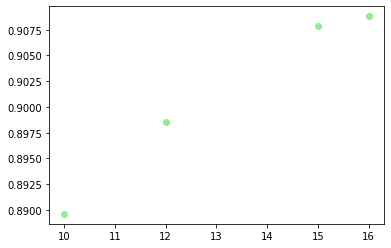

In [88]:
plt.scatter(res_set, res_NSk_mean, c='lightgreen')

Text(0.5, 1.0, 'NSk vs # of classes')

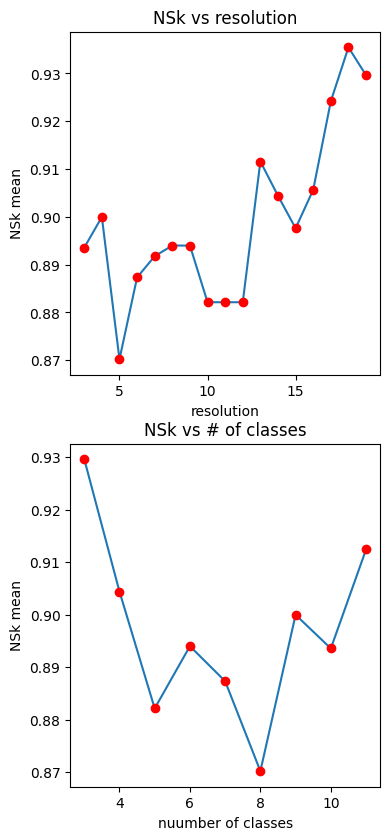

In [10]:
res_set = list(rel_table['resolution'].drop_duplicates().sort_values().values)
res_NSk_mean = [rel_table[rel_table['resolution']==i]['NSk_mean'].values.min() for i in res_set]
class_set = list(rel_table['num_class'].drop_duplicates().sort_values().values)
class_NSk_mean = [rel_table[rel_table['num_class']==i]['NSk_mean'].values.min() for i in class_set]

fig = plt.figure(figsize=[4, 10], dpi=100)
ax1 = fig.add_subplot(211)
ax1.plot(res_set, res_NSk_mean)
ax1.plot(res_set, res_NSk_mean, 'ro')
ax1.set_xlabel('resolution')
ax1.set_ylabel('NSk mean')
ax1.set_title('NSk vs resolution')

ax2 = fig.add_subplot(212)
ax2.plot(class_set, class_NSk_mean)
ax2.plot(class_set, class_NSk_mean, 'ro')
ax2.set_xlabel('nuumber of classes')
ax2.set_ylabel('NSk mean')
ax2.set_title('NSk vs # of classes')